In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()

import warnings
warnings.filterwarnings('ignore')


In [3]:
rand_state=1000

In [4]:
read_file = pd.read_csv(r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli4Polygon1.txt') 

In [5]:
read_file.to_csv (r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli4Polygon1.csv', index=None)

In [6]:
df = pd.read_table('AOI_hitStimuli4Polygon1.csv')

In [7]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli4_Polygon1
0,Skilled,602,229,366,605,232,0
1,Skilled,605,231,366,605,232,0
2,Skilled,605,229,366,605,232,0
3,Skilled,606,229,366,605,232,0
4,Skilled,608,229,366,605,232,0


In [8]:
df.nunique()

Skill_level                    2
Gaze_point_X                 815
Gaze_point_Y                 762
Gaze_event_duration          102
Fixation_point_X             374
Fixation_point_Y             423
AOI_hit_Stimuli4_Polygon1      2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18043 entries, 0 to 18042
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Skill_level                18043 non-null  object
 1   Gaze_point_X               18043 non-null  int64 
 2   Gaze_point_Y               18043 non-null  int64 
 3   Gaze_event_duration        18043 non-null  int64 
 4   Fixation_point_X           18043 non-null  int64 
 5   Fixation_point_Y           18043 non-null  int64 
 6   AOI_hit_Stimuli4_Polygon1  18043 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 986.9+ KB


In [10]:
df.isna().sum()

Skill_level                  0
Gaze_point_X                 0
Gaze_point_Y                 0
Gaze_event_duration          0
Fixation_point_X             0
Fixation_point_Y             0
AOI_hit_Stimuli4_Polygon1    0
dtype: int64

In [11]:
df.describe()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli4_Polygon1
count,18043.000000,18043.000000,18043.000000,18043.000000,18043.000000,18043.000000
mean,792.014465,297.536385,615.366846,791.823865,297.592418,0.057252
std,165.894870,128.723270,584.985669,165.469358,127.863779,0.232330
min,108.000000,-11.000000,66.000000,122.000000,6.000000,0.000000
25%,691.000000,214.000000,250.000000,687.000000,215.000000,0.000000
50%,853.000000,276.000000,416.000000,854.000000,276.000000,0.000000
75%,901.000000,354.000000,732.000000,899.000000,354.000000,0.000000
max,1322.000000,1101.000000,2812.000000,1260.000000,875.000000,1.000000


<Figure size 600x400 with 0 Axes>

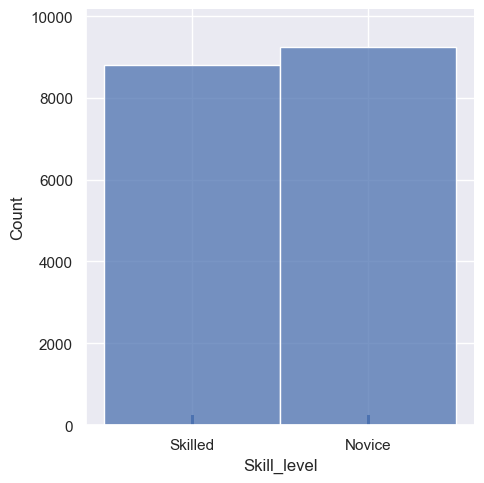

In [12]:
plt.figure(figsize=(6,4))
sns.displot(df['Skill_level'], rug=True)
plt.show()

In [13]:
ordinal_categoricals = ['Skill_level']

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
enc = OrdinalEncoder()

In [16]:
df[ordinal_categoricals] = enc.fit_transform(df[ordinal_categoricals])

In [17]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli4_Polygon1
0,1.0,602,229,366,605,232,0
1,1.0,605,231,366,605,232,0
2,1.0,605,229,366,605,232,0
3,1.0,606,229,366,605,232,0
4,1.0,608,229,366,605,232,0


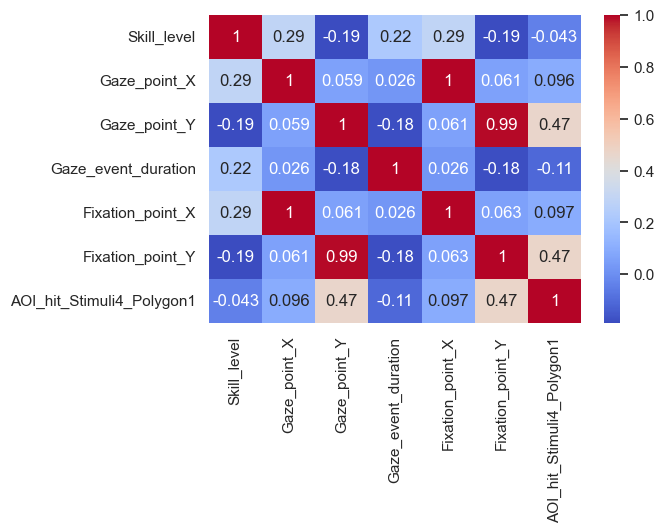

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

CPU times: total: 8.98 s
Wall time: 9.18 s


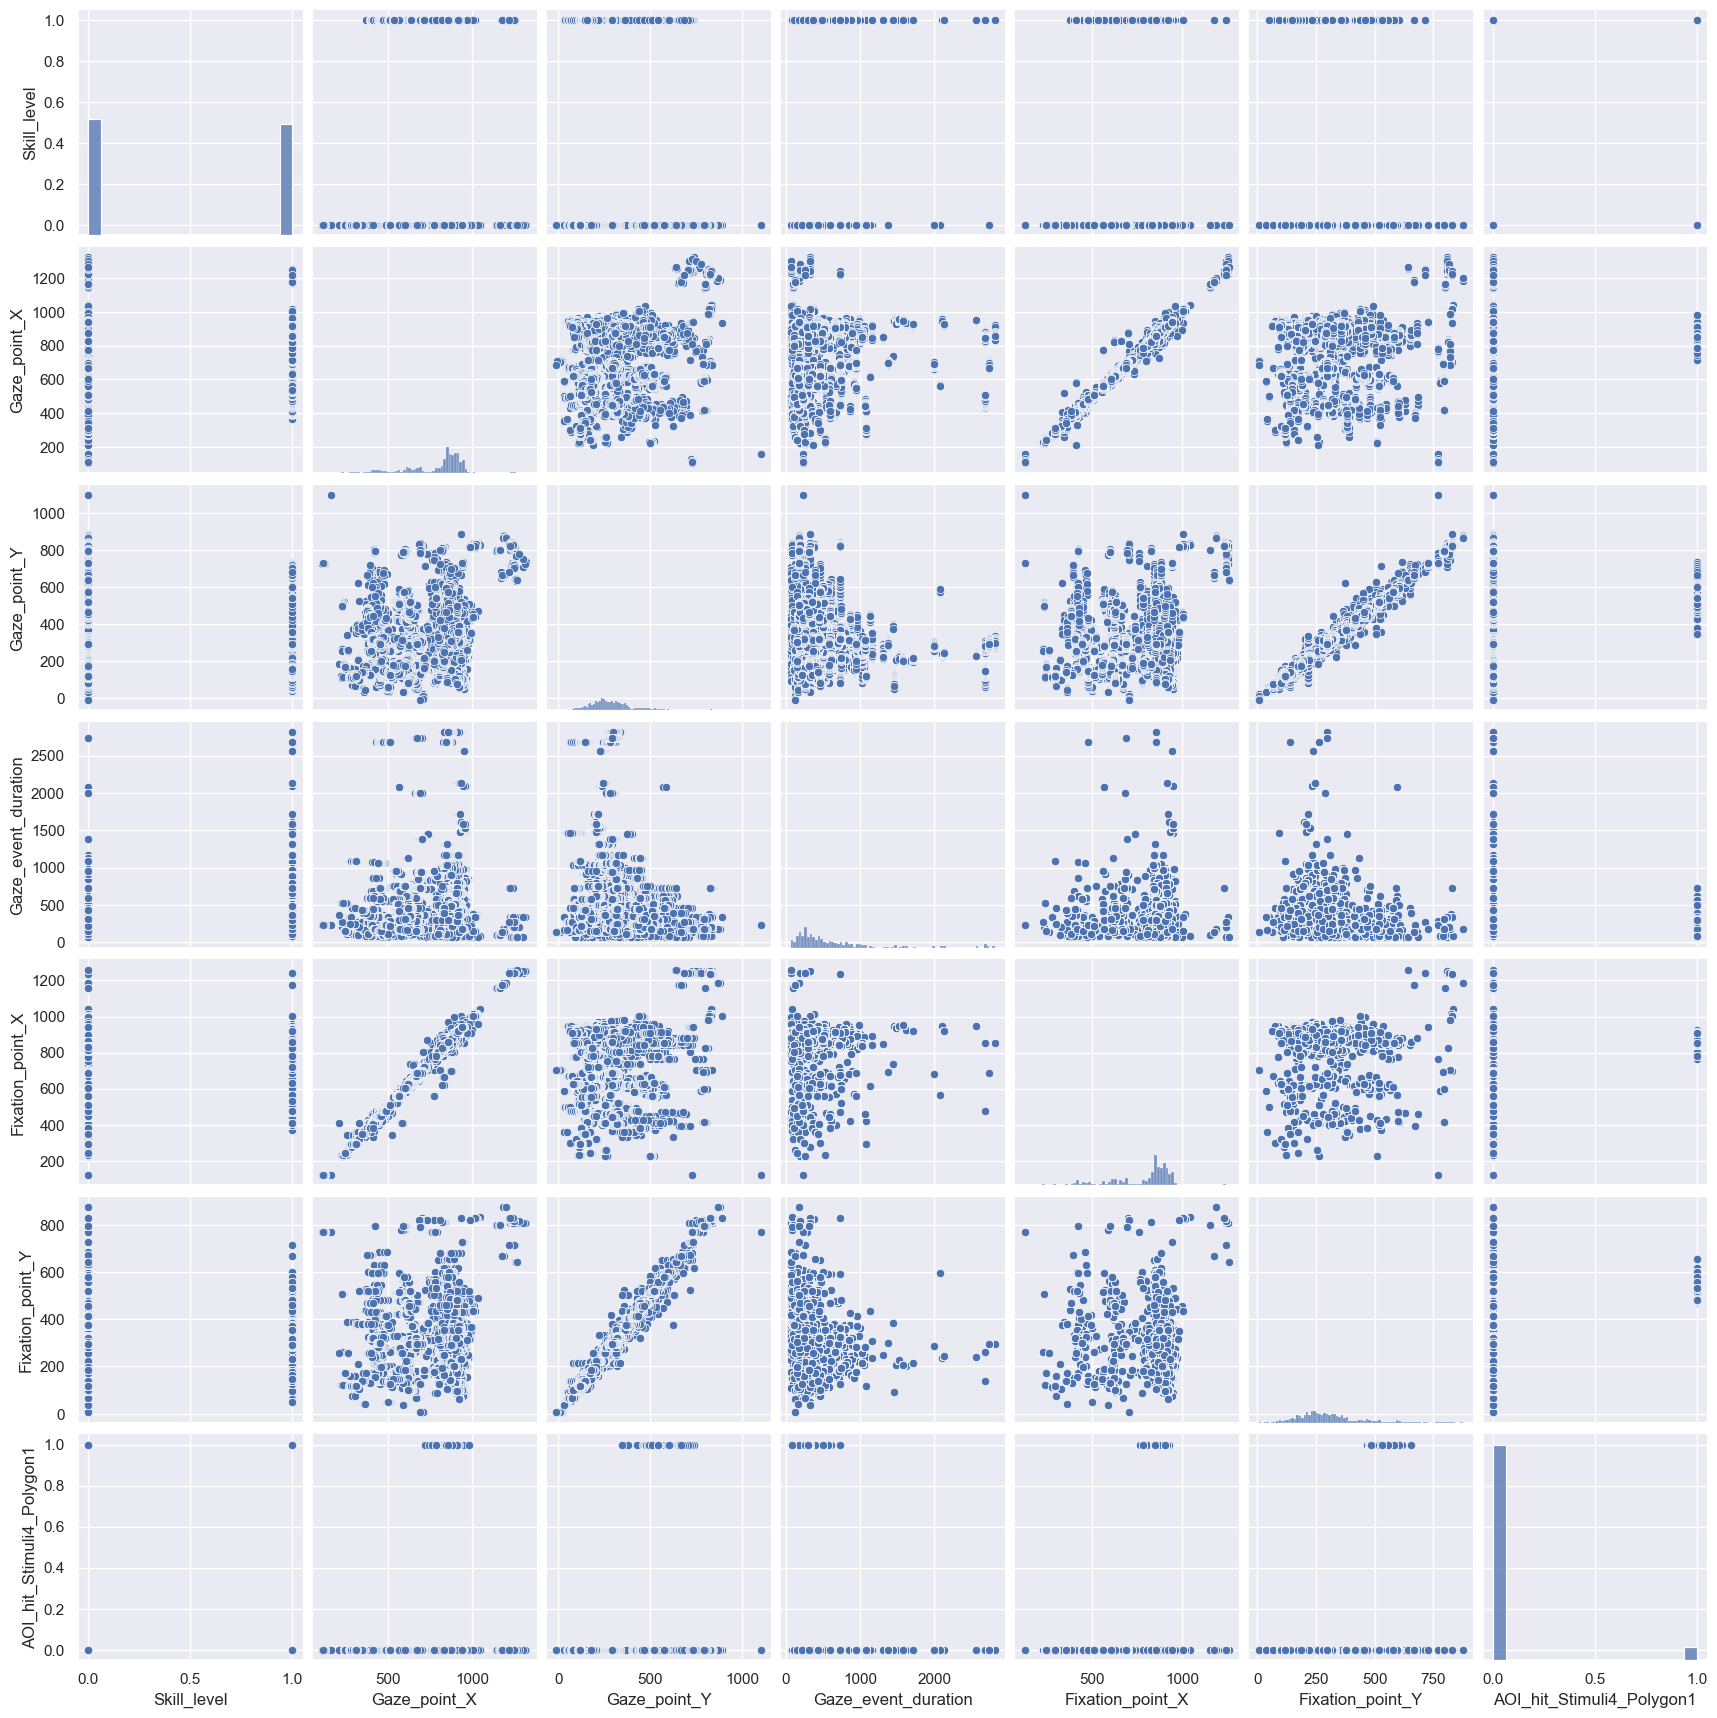

In [20]:
%%time

sns.pairplot(df[['Skill_level', 'Gaze_point_X', 'Gaze_point_Y', 'Gaze_event_duration', 'Fixation_point_X', 'Fixation_point_Y', 'AOI_hit_Stimuli4_Polygon1' ]])

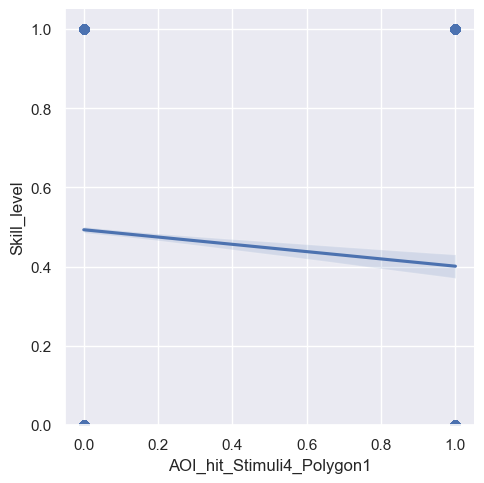

In [21]:
g= sns.lmplot(x='AOI_hit_Stimuli4_Polygon1', y='Skill_level', data=df)
g.set(ylim=(0, None))
plt.show()

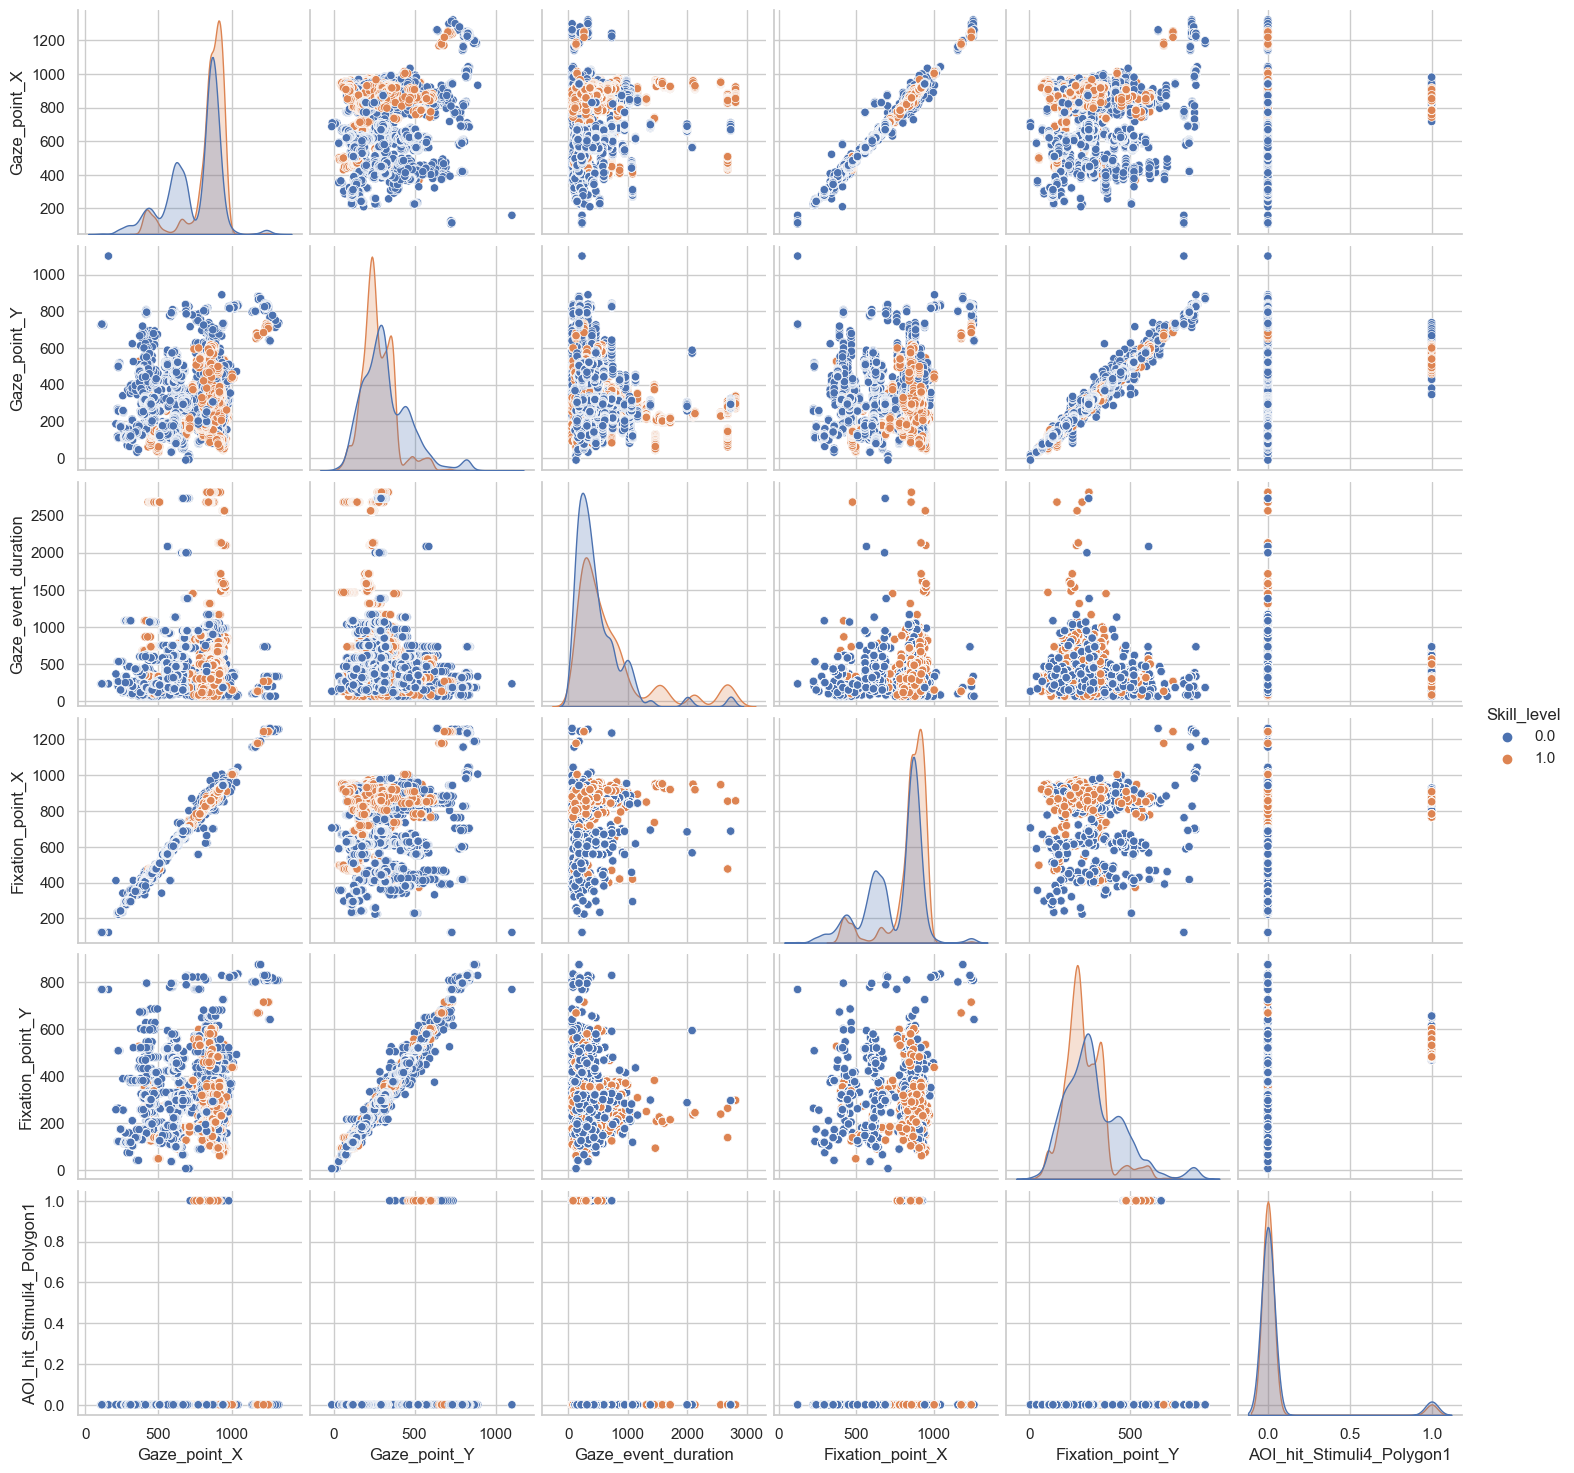

In [22]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Skill_level')

In [26]:
y = df['Skill_level']
X = df.drop('Skill_level', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

np.round(len(X_train)/len(X),3)

0.8

In [27]:
reg_model = LinearRegression()


In [28]:
X_train.head()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli4_Polygon1
12810,785,161,882,794,162,0
14582,468,143,2679,476,138,0
15481,650,456,466,651,460,0
8769,827,533,300,830,517,1
7985,903,380,965,902,370,0


In [29]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_hat = reg_model.predict(X_test)

In [31]:
df_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})
df_predictions.head()

,actuals,predictions,resid
15796,0.0,0.316035,-0.316035
6548,1.0,0.461403,0.538597
1947,1.0,0.053609,0.946391
6471,1.0,0.676419,0.323581
1505,1.0,0.822883,0.177117


In [32]:
reg_model.coef_

array([-6.79962413e-04, -5.55987166e-05,  1.56526943e-04,  1.57269378e-03,
       -6.84782197e-04,  7.75212925e-02])

In [33]:
reg_model.intercept_

-0.10092824164939684

In [34]:
reg_summary = pd.DataFrame(data= X_train.columns, columns=['Features'])
reg_summary ['Coefficients'] = np.round(reg_model.coef_,4)
reg_summary

,Features,Coefficients
0,Gaze_point_X,-0.0007
1,Gaze_point_Y,-0.0001
2,Gaze_event_duration,0.0002
3,Fixation_point_X,0.0016
4,Fixation_point_Y,-0.0007
5,AOI_hit_Stimuli4_Polygon1,0.0775


In [35]:
print('Training data R-squared:', np.round(reg_model.score(X_train, y_train),3))
print('Test data R-squared:', np.round(reg_model.score(X_train, y_train),3))

Training data R-squared: 0.162
Test data R-squared: 0.162


In [36]:
X_train.shape

(14434, 6)

In [37]:
def adj_R2(X,y):
    R2 = reg_model.score(X,y)
    n = X.shape[0]
    k = X.shape[1]
    return np.round(1-(1-R2)*(n-1)/(n-k-1),3)

In [38]:
adj_R2(X_train, y_train)

0.162

In [39]:
df_predictions.head()

,actuals,predictions,resid
15796,0.0,0.316035,-0.316035
6548,1.0,0.461403,0.538597
1947,1.0,0.053609,0.946391
6471,1.0,0.676419,0.323581
1505,1.0,0.822883,0.177117


In [40]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

0.214

In [41]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

0.214

In [42]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.463

In [43]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [44]:
my_estimator = LinearRegression()

In [45]:
R2 = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="r2")

In [46]:
R2

array([0.15562635, 0.16567542, 0.16353136, 0.15542754, 0.16482909])

In [47]:
NMSE = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")

In [48]:
MSE = -NMSE
MSE

array([0.21061805, 0.20857551, 0.20905692, 0.21100062, 0.20824363])

In [49]:
MSE_CV = np.mean(MSE)
np.round(MSE_CV,3)

0.209

In [50]:
RMSE = np.sqrt(MSE)
RMSE

array([0.45893142, 0.45670068, 0.45722743, 0.45934804, 0.45633719])